# Car Price Prediciton On New Cars

This dataset was derived from https://www.cardekho.com/. The dataset consists specifications list as we all rating only for new cars.

Dataset Description:
- This dataset consists of 16 features on a total of 203 car choices available in India.

source: https://www.kaggle.com/datasets/tr1gg3rtrash/cars-2022-dataset

I wil do an analysis on this data set and try to create a price prediction model using the features available

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/DataSets/CARS_1.csv")

In [3]:
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [4]:
df.shape

(203, 16)

the data set is very small, only 203 rows and 16 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

In [6]:
df.isnull().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       1
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

only 1 null value in the seating capacity column

In [11]:
print(f'duplicated rows = {df.duplicated().sum()} ')

duplicated rows = 0 


there are no duplicated rows either 

In [12]:
# checking for wrong entries such as special symbols e.g -,?,*,#,$ etc.


for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

car_name : ['Maruti Alto K10' 'Maruti Brezza' 'Mahindra Thar' 'Mahindra XUV700'
 'Mahindra Scorpio-N' 'Toyota Fortuner' 'Hyundai Creta' 'Tata Punch'
 'Mahindra Bolero' 'Maruti Swift' 'Tata Nexon' 'Hyundai Venue'
 'Kia Seltos' 'Hyundai Tucson' 'Tata Harrier' 'Maruti Baleno'
 'Toyota Innova Crysta' 'Maruti Ertiga' 'Kia Sonet' 'Maruti Dzire'
 'Honda City 4th Generation' 'Land Rover Range Rover' 'Tata Tiago'
 'Hyundai i20' 'Mahindra XUV300' 'MG Hector' 'Tata Altroz'
 'Mahindra Scorpio Classic' 'Hyundai Verna' 'Citroen C3' 'Honda City'
 'Maruti Celerio' 'Nissan Magnite' 'Renault KWID' 'Land Rover Defender'
 'Maruti Alto 800' 'Hyundai Kona Electric' 'Tata Tigor' 'Renault Kiger'
 'Maruti S-Presso' 'MG Astor' 'Lamborghini Urus' 'Honda Amaze'
 'Renault Triber' 'Hyundai Alcazar' 'Hyundai Aura' 'Volkswagen Virtus'
 'Skoda Slavia' 'Maruti Ignis' 'Mercedes-Benz GLA' 'Volvo XC90'
 'Skoda Kushaq' 'Maruti XL6' 'Jeep Wrangler' 'Maruti Eeco' 'Force Gurkha'
 'Maruti S-Cross' 'Maruti Ciaz' 'Hyundai Santro

The data set appears to be clean with no special symbols present

<AxesSubplot:>

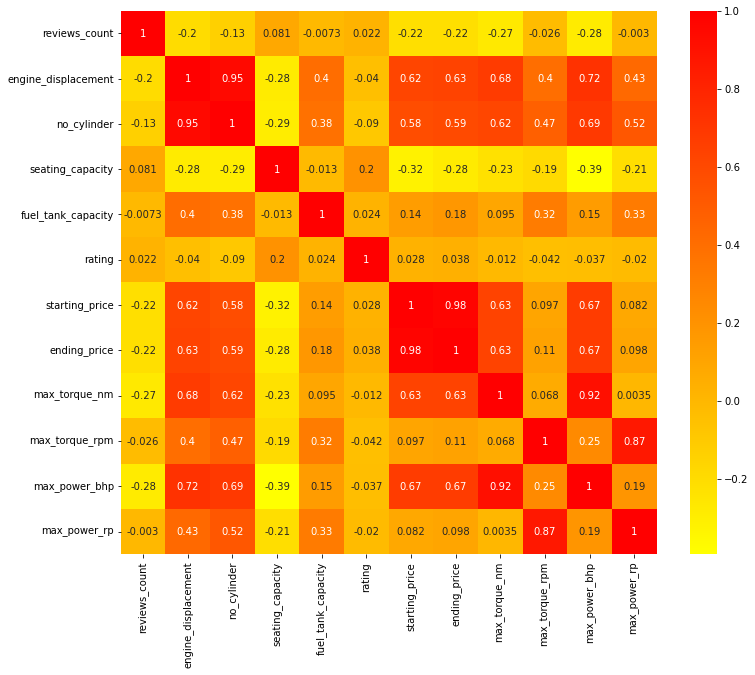

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='autumn_r')

- 'starting price' and 'engine displacement' have good correlation 0.62
- 'starting price' and 'no of cylinder' also have good correlation 0.58
- 'starting price' and 'max power bhp' have highest correlation 0.67
- 'starting price' and 'max torque nm' have highest correlation 0.63

## Exploratory Data Analysis

In [14]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['car_name', 'fuel_type', 'transmission_type', 'body_type']


In [15]:
for feature in cat_feature:
    print(f'{feature} has {len(df[feature].unique())} values')

car_name has 199 values
fuel_type has 4 values
transmission_type has 3 values
body_type has 11 values


## Categorical Features

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


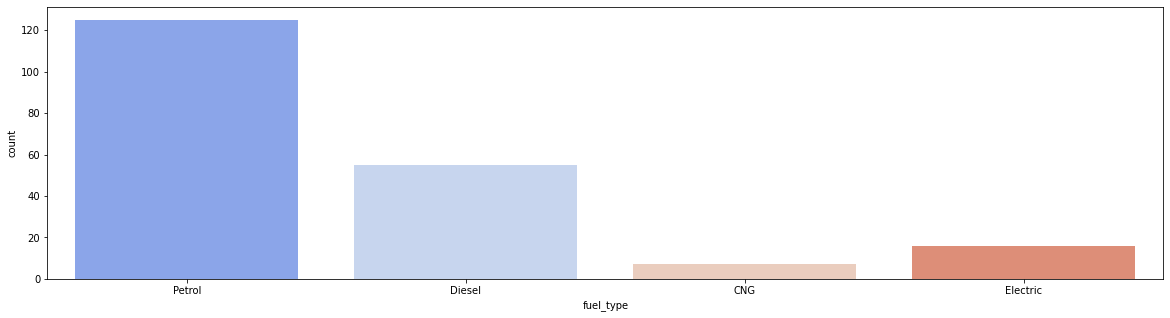

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


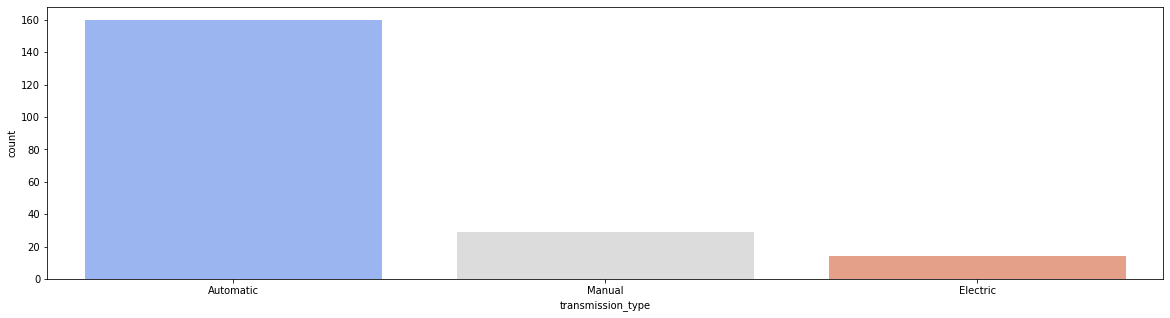

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


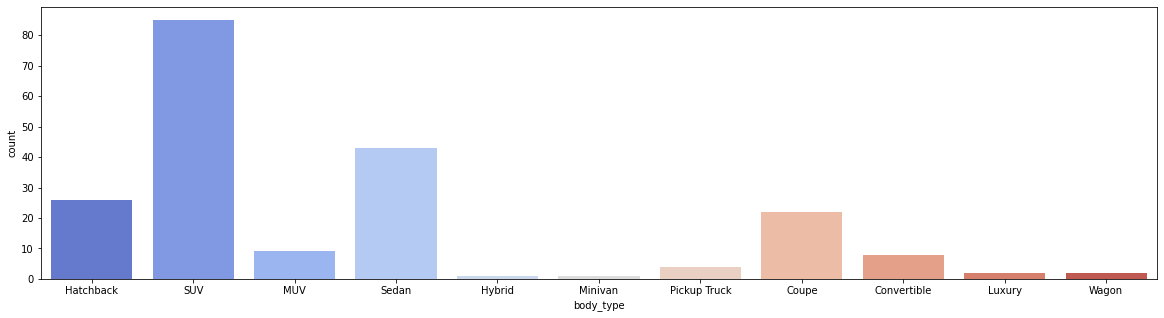

In [16]:
cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<50]
for feature in cat_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="coolwarm")
    plt.show()

- Petrol is the most preferred petrol type of the four
- Automatic is more popular than both electric and manual
- SUV vehicle types are the most present in the data set
- Sedan, Hatchback and Coupes are common too

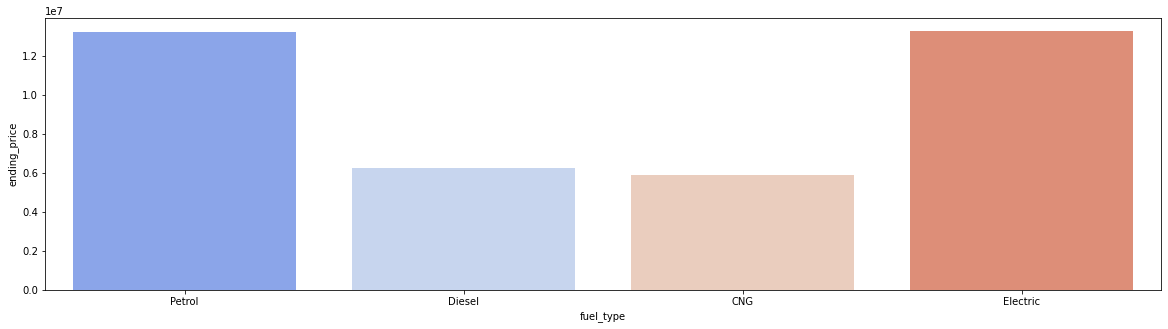

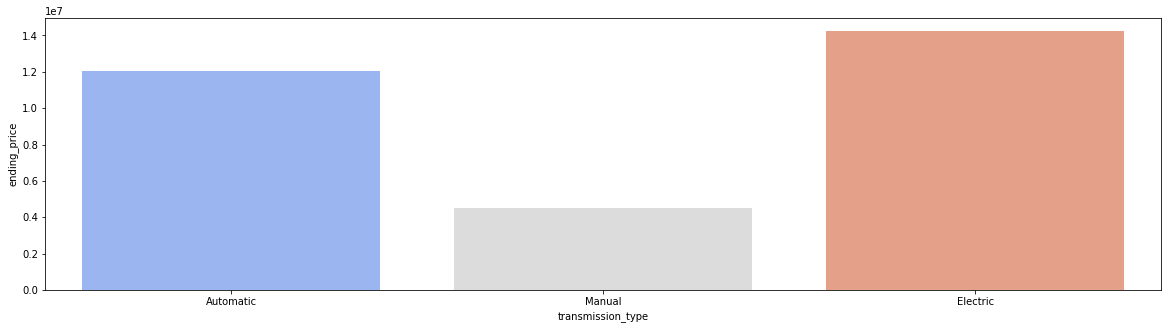

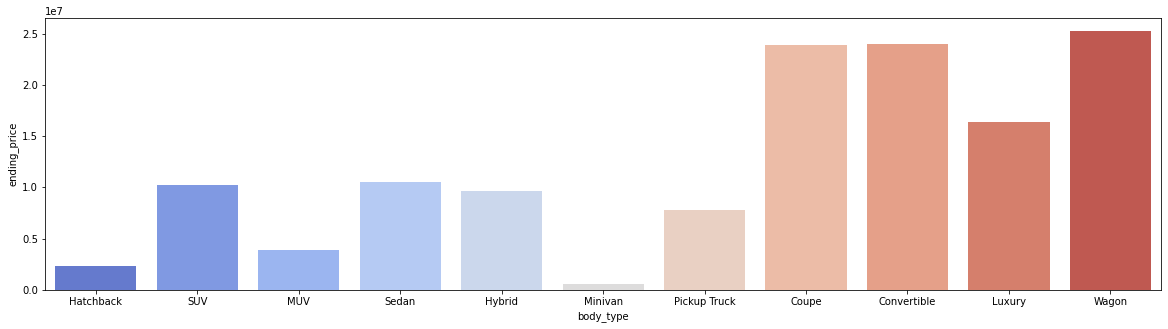

In [18]:
for feature in cat_feature1:
    plt.figure(figsize = (20, 5))
    sns.barplot(x=df[feature],y=df['ending_price'],ci=None,palette='coolwarm')
    plt.show()

- electric and petrol are priced the same but diesel and CNG are significantly lower
- electric vehicles are the more expensive type, automatic is very close second
- coupe, convertible and wagon with the highest ending price

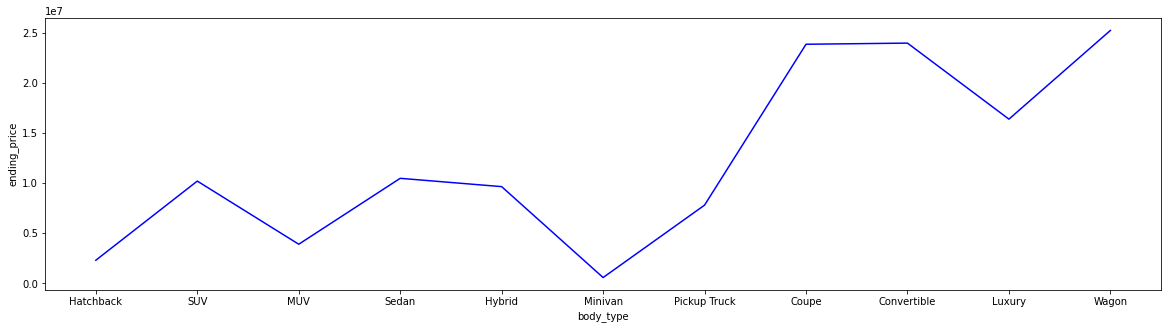

In [19]:
plt.figure(figsize = (20, 5))
sns.lineplot(x=df['body_type'],y=df['ending_price'],ci=None,palette='pastel',color='Blue')
plt.show()

In [22]:
int_feature=[feature for feature in df.columns if df[feature].dtype =='int64']
print(int_feature)

['reviews_count', 'engine_displacement', 'no_cylinder', 'starting_price', 'ending_price', 'max_torque_rpm', 'max_power_rp']


C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


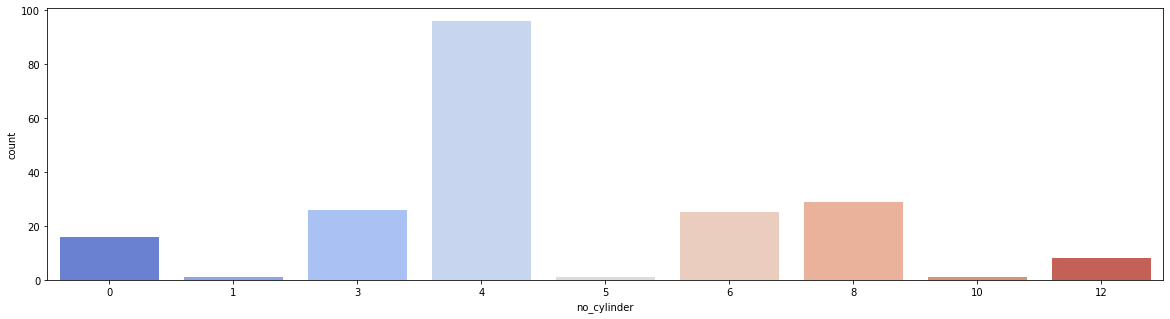

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


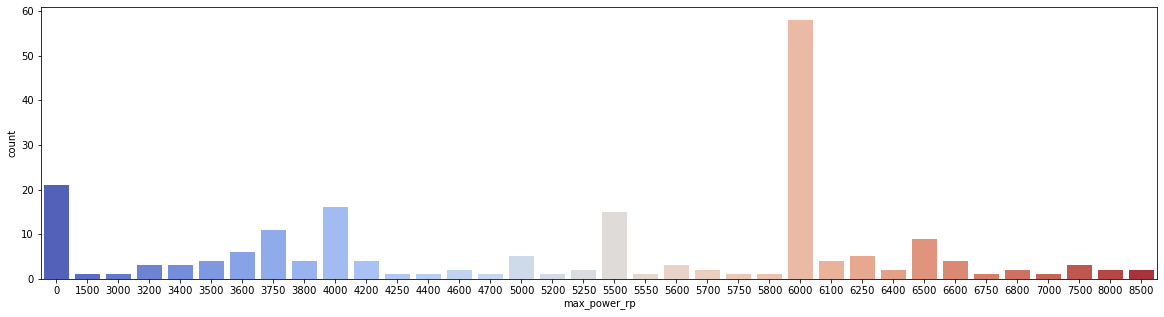

In [37]:
int_feature1=[feature for feature in int_feature if len(df[feature].unique())<50]
for feature in int_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="coolwarm")
    plt.show()

In [24]:
float_feature=[feature for feature in df.columns if df[feature].dtype =='float64']
print(float_feature)

['seating_capacity', 'fuel_tank_capacity', 'rating', 'max_torque_nm', 'max_power_bhp']


C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


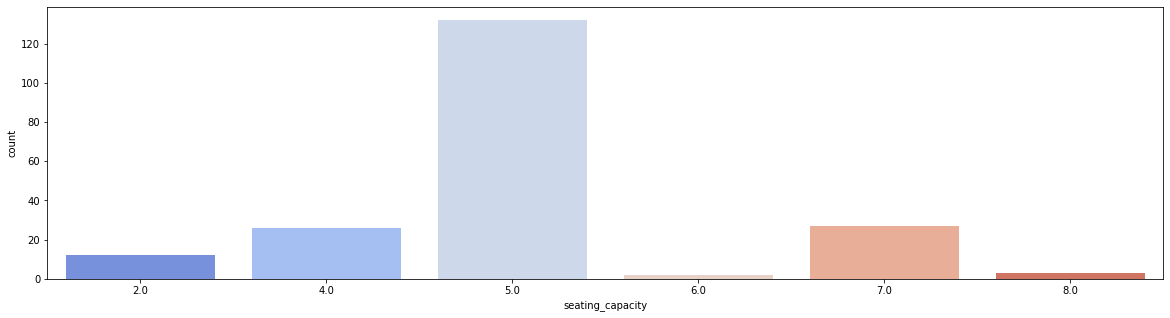

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


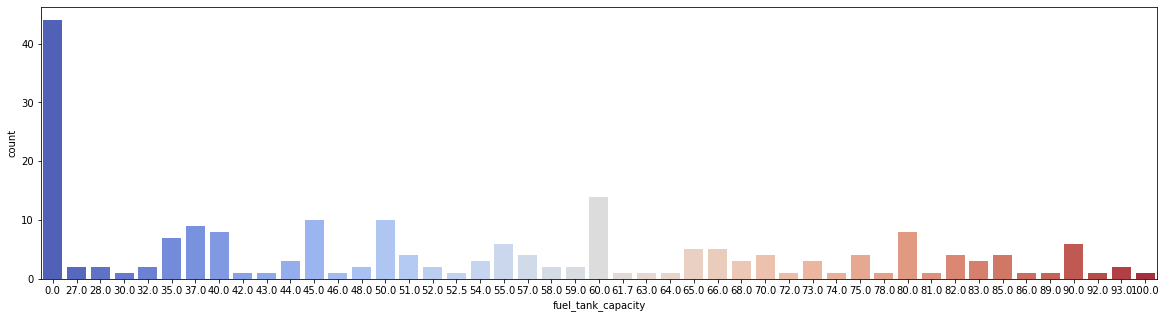

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


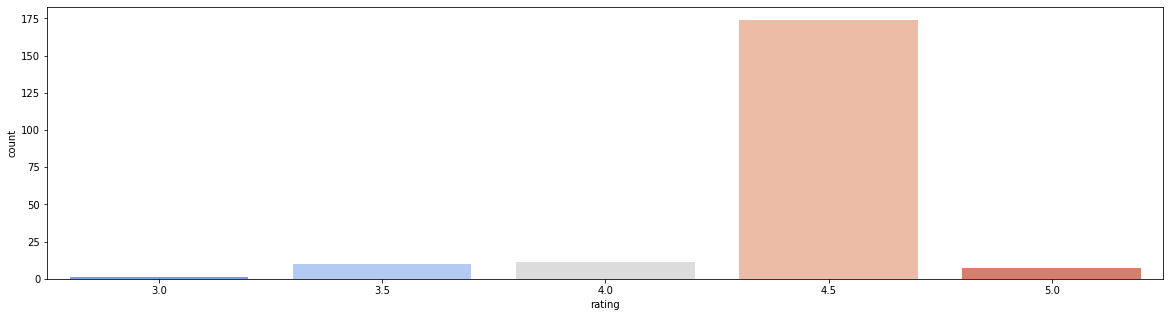

In [40]:
float_feature1=[feature for feature in float_feature if len(df[feature].unique())<50]
for feature in float_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="coolwarm")
    plt.show()

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='starting_price', ylabel='Density'>

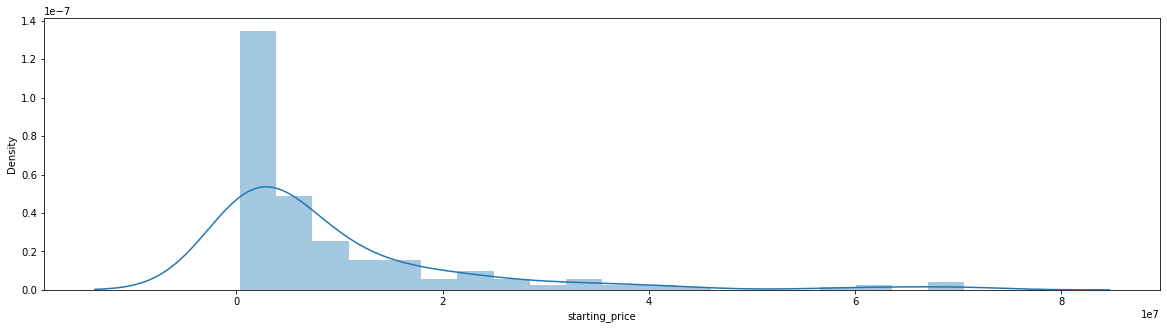

In [44]:
plt.figure(figsize = (20, 5))
sns.distplot(df['starting_price'], kde=True)

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ending_price', ylabel='Density'>

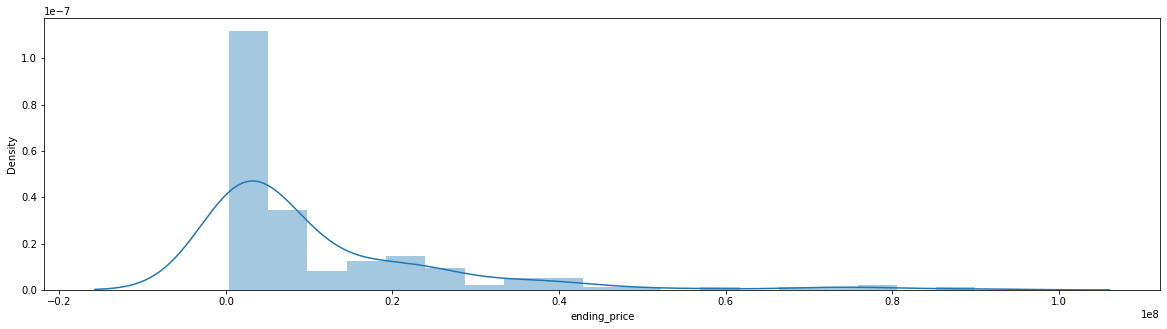

In [45]:
plt.figure(figsize = (20, 5))
sns.distplot(df['ending_price'], kde=True)

both the starting price and ending price are left skewed, suggesting that the mean value is larger than the median value

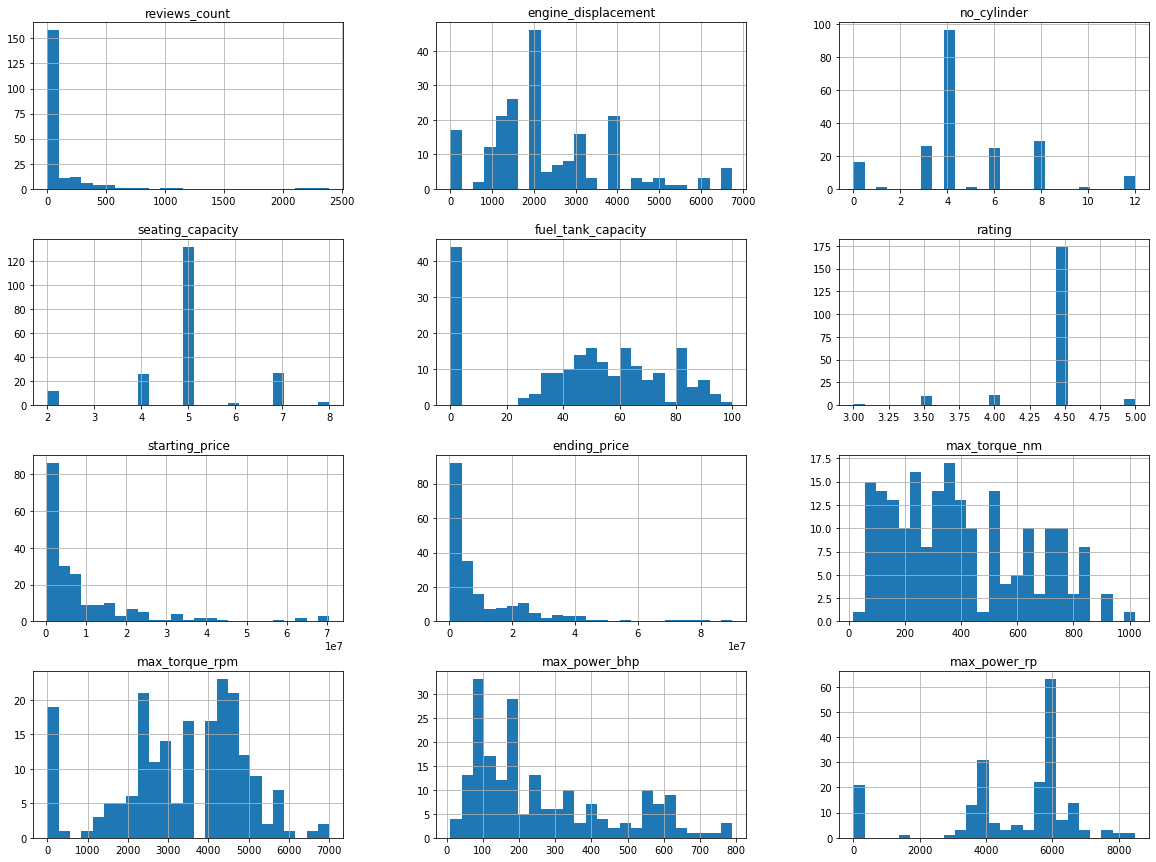

In [46]:
df.hist(bins=25, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='max_torque_nm', ylabel='ending_price'>

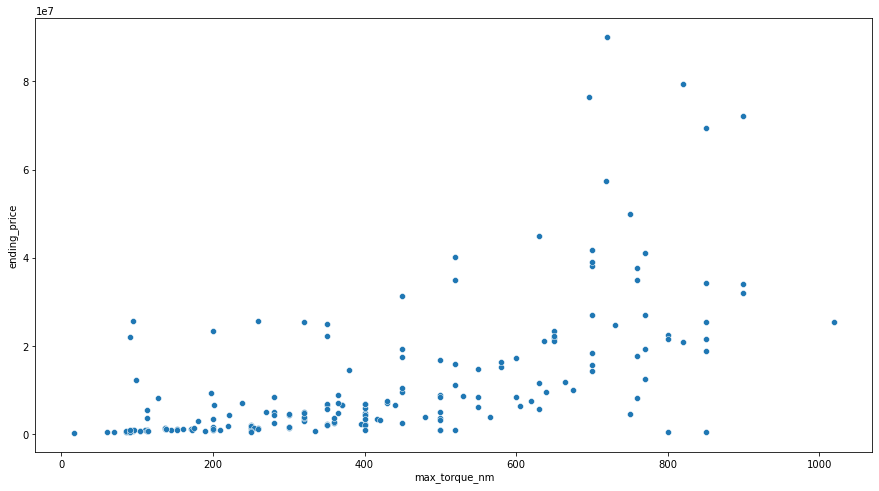

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='max_torque_nm', y='ending_price')

<AxesSubplot:xlabel='max_torque_rpm', ylabel='ending_price'>

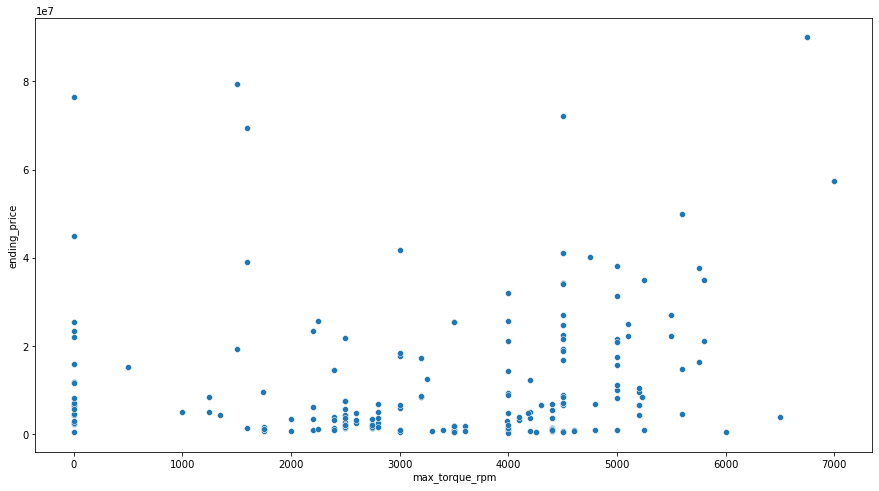

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='max_torque_rpm', y='ending_price')

In [54]:
print('The minimum price is: ', df['ending_price'].min())
print('The maximum price is: ', df['ending_price'].max())
print('The average price is: ', df['ending_price'].mean())

The minimum price is:  361000
The maximum price is:  90000000
The average price is:  11120054.187192118


there seems to be values that are non sensible, we can look into these

In [57]:
df[df['ending_price'] == df['ending_price'].max()]

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
65,Lamborghini Aventador,52,Petrol,6498,12,2.0,Automatic,90.0,Coupe,4.5,62500000,90000000,720.0,6750,759.01,8500


In [58]:
df[df['ending_price'] == df['ending_price'].min()]

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
91,Bajaj Qute (RE60),43,CNG,216,1,4.0,Manual,35.0,Hatchback,4.0,361000,361000,16.1,4000,10.8,5500


### Removing Outliers

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

<AxesSubplot:xlabel='starting_price'>

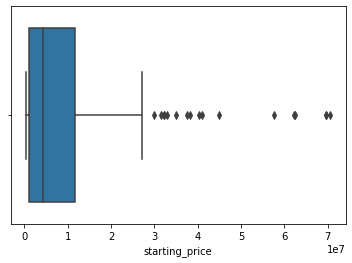

In [77]:
sns.boxplot(data = df, x = 'starting_price')

<AxesSubplot:xlabel='ending_price'>

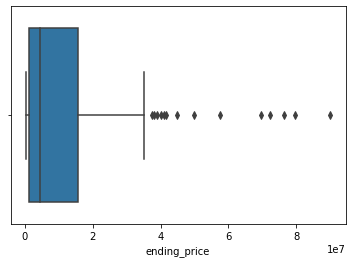

In [78]:
sns.boxplot(data = df, x = 'ending_price')

<AxesSubplot:xlabel='max_torque_nm'>

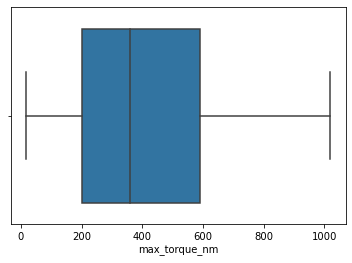

In [68]:
sns.boxplot(data = df, x = 'max_torque_nm')

<AxesSubplot:xlabel='max_torque_rpm'>

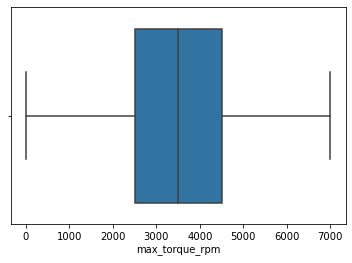

In [79]:
sns.boxplot(data = df, x = 'max_torque_rpm')

<AxesSubplot:xlabel='max_power_bhp'>

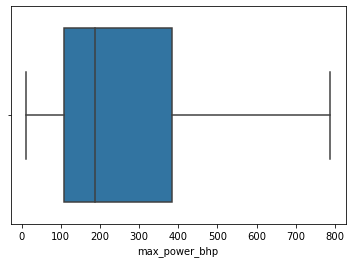

In [82]:
sns.boxplot(data = df, x = 'max_power_bhp')

<AxesSubplot:xlabel='max_power_rp'>

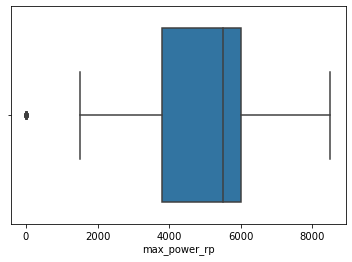

In [81]:
sns.boxplot(data = df, x = 'max_power_rp')

there are large outliers present at the 'starting price' and 'ending price' columns. We can try to get rid of these outliers using the IQR method (interquartile range)

In [83]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [84]:
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\nikau\AppData\Local\Temp/ipykernel_16240/3382395134.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:xlabel='starting_price'>

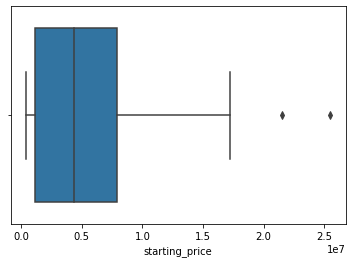

In [85]:
sns.boxplot(data = df, x = 'starting_price')

<AxesSubplot:xlabel='ending_price'>

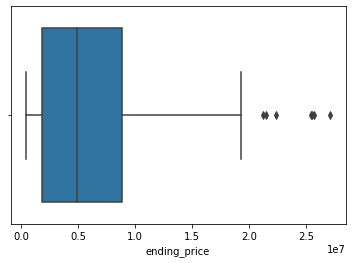

In [86]:
sns.boxplot(data = df, x = 'ending_price')

In [87]:
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
11,Hyundai Venue,36,Petrol,998,3,5.0,Automatic,45.0,SUV,4.5,753000,1272000,172.0,4000,118.41,6000
13,Hyundai Tucson,8,Diesel,1997,4,5.0,Automatic,54.0,SUV,4.5,2770000,3454000,416.0,2750,183.72,4000
15,Maruti Baleno,137,Petrol,1197,4,5.0,Automatic,37.0,Hatchback,4.5,649000,971000,113.0,4400,88.50,6000


Great, using the IQE method removed much of the outliers that were present. Dataset looking much more balanced now 

In [92]:
# encoding all of the categorical values to numerical values before fitting the model

from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()


for feature in ['car_name','fuel_type','transmission_type', 'body_type']:
    df[feature]=encode.fit_transform(df[feature])

C:\Users\nikau\AppData\Local\Temp/ipykernel_16240/2885841997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=encode.fit_transform(df[feature])


In [93]:
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,33,51,2,998,3,5.0,0,27.0,1,4.5,399000,583000,89.0,3500,65.71,5500
1,35,86,2,1462,4,5.0,0,48.0,4,4.5,799000,1396000,136.8,4400,101.65,6000
11,20,36,2,998,3,5.0,0,45.0,4,4.5,753000,1272000,172.0,4000,118.41,6000
13,19,8,1,1997,4,5.0,0,54.0,4,4.5,2770000,3454000,416.0,2750,183.72,4000
15,34,137,2,1197,4,5.0,0,37.0,1,4.5,649000,971000,113.0,4400,88.50,6000


#### **Splitting into Train set and Test set**

In [107]:
x = df.drop(['starting_price','ending_price'], axis=1)
y = df['ending_price']

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0) 

In [109]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (59, 14)
X_test: (15, 14)
Y_train: (59,)
Y_test: (15,)


In [110]:
# scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [111]:
x.head(3)

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,33,51,2,998,3,5.0,0,27.0,1,4.5,89.0,3500,65.71,5500
1,35,86,2,1462,4,5.0,0,48.0,4,4.5,136.8,4400,101.65,6000
11,20,36,2,998,3,5.0,0,45.0,4,4.5,172.0,4000,118.41,6000


In [112]:
y.head(3)

0      583000
1     1396000
11    1272000
Name: ending_price, dtype: int64

#### **Model Formation**

In [113]:
# Create Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [114]:
def view_coeff(x, lr):
    model_coefs = pd.DataFrame({'variable': x.columns,
                                'coef': lr.coef_,
                                'abs_coef': np.abs(lr.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

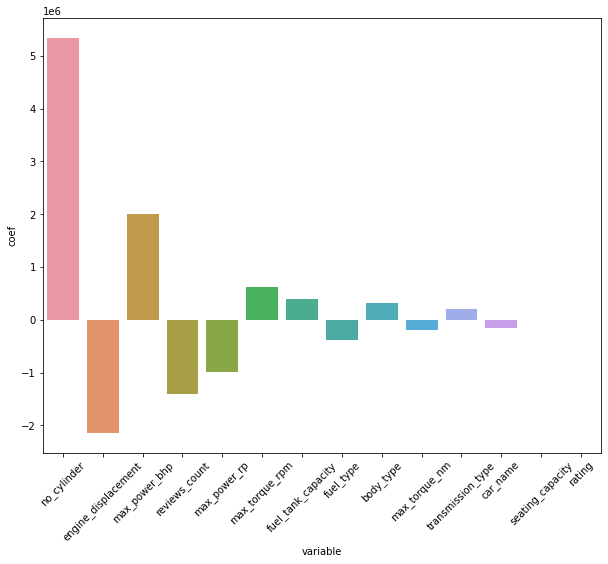

In [115]:
# Plot Coefficients
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, lr)

This bar graph represents which of the features have to most influence on the model:

- No of cylinders has the most importance when considering the price of the vehicles, the higher the cylinder amount the higher the value
- Engine displacement and max power bhp (horsepower) are the other two important features

In [122]:
# we will need to determine the best of parameter for the model using the gridsearch cv

In [117]:
parameter = {"fit_intercept":[True, False],
             "normalize":[True, False]}

lr_cv = GridSearchCV(lr, parameter, scoring='r2', cv=5)
lr_cv.fit(x_train, y_train)

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [118]:
# trying to find the best possible parameters to use in the model

lr_cv.best_params_

{'fit_intercept': True, 'normalize': True}

In [119]:
lr_cv_predict = lr_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=lr_cv_predict)

score

0.441437600284978

got an R^2 score of 44%. not bad precision

In [120]:
y_pred_linear = lr_cv.predict(x_test)

In [123]:
linear_mae = mean_absolute_error(y_test, y_pred_linear, multioutput='raw_values')
print('Mean Absolute Error Value is : ', linear_mae)

linear_mse = mean_squared_error(y_test, y_pred_linear, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(linear_mse))

Mean Absolute Error Value is :  [3519703.98904372]
Mean Squared Error Value by Square root is :  [5315410.03402813]


#### **Ridge Regression**

In [125]:
ridge=Ridge()

In [126]:
# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    errors.append(mean_squared_error(ridge.coef_, ridge.coef_))

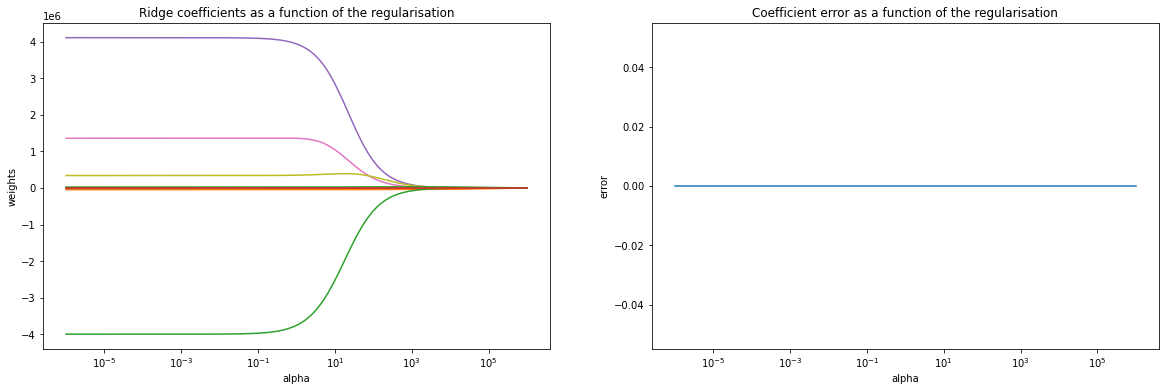

In [127]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

- The ridge regression will penalize your coefficients, such that those that are the least effective in your estimation will "shrink" the fastest.
- I would say though the faster a coefficient is shrinking the less important it is in prediction;

In [128]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(x, y))

Alpha: 217111.79456945008
Score: 0.4851923907478891


after using GridSearch cross validation, I have yielded better results with a score of 48%

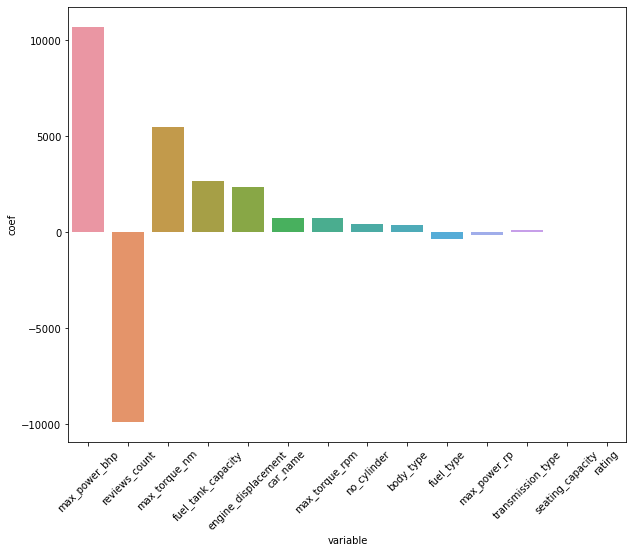

In [129]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, optimal_ridge)

- ridge is suggesting that max horsepower (max power bhp) and the reviews count are the more important features
- linear model chose no of cylinders and engine displacement to be more prevalent

In [130]:
# cross validation

parameter={
    'alpha':[ 1 ,0.5, 0.1, 0.01,5 , 10, 50,100]
}

ridge_cv=GridSearchCV(ridge,parameter,scoring='r2',cv=5)
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=1000000.0),
             param_grid={'alpha': [1, 0.5, 0.1, 0.01, 5, 10, 50, 100]},
             scoring='r2')

In [131]:
ridge_cv_predict = ridge_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=ridge_cv_predict)

score

0.057861376012192545

In [132]:
y_pred_ridge = ridge_cv.predict(x_test)

In [133]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge, multioutput='raw_values')
print('Mean Absolute Error Value is : ', linear_mae)

ridge_mse = mean_squared_error(y_test, y_pred_ridge, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(ridge_mse))

Mean Absolute Error Value is :  [3519703.98904372]
Mean Squared Error Value by Square root is :  [6903325.12069393]


#### **Lasso Regression** 

In [135]:
lasso = Lasso()

In [136]:
parameter={
    'alpha':[ 1 ,0.5, 2, 0.01, 5 , 10, 50, 100]
}

lasso_cv=GridSearchCV(lasso,parameter,scoring='r2',cv=5)
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.5, 2, 0.01, 5, 10, 50, 100]},
             scoring='r2')

In [137]:
lasso_cv_predict = lasso_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=lasso_cv_predict)

score

0.44095536956615744

In [138]:
y_pred_lasso = lasso_cv.predict(x_test)

In [139]:
lasso_mae = mean_absolute_error(y_test, y_pred_lasso, multioutput='raw_values')
print('Mean Absolute Error Value is : ', lasso_mae)

lasso_mse = mean_squared_error(y_test, y_pred_lasso, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(lasso_mse))

Mean Absolute Error Value is :  [3521162.13682972]
Mean Squared Error Value by Square root is :  [5317704.04898504]


In [142]:
# keeping track of the results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x,y)
    coefs.append(lasso.coef_)
    errors.append(mean_squared_error(lasso.coef_, lasso.coef_))

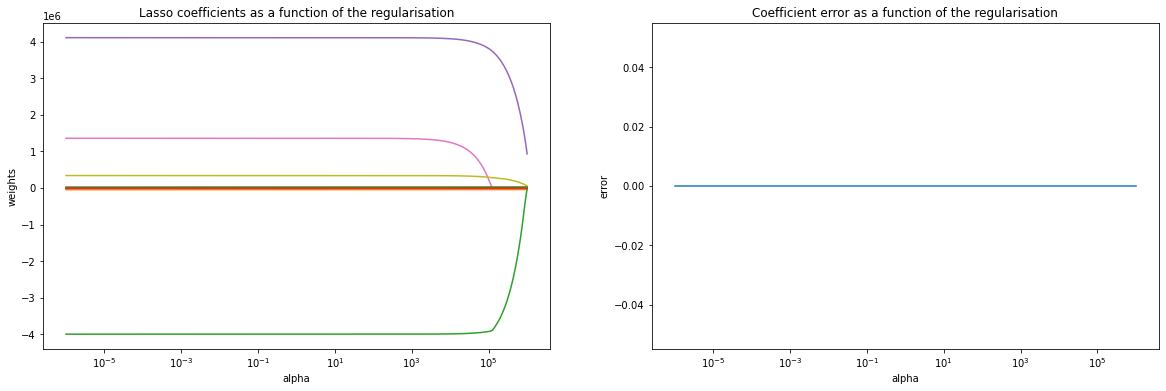

In [143]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Lasso regression has a very similar approach to Ridge, except the difference in Lasso is that it tends to make coefficients to absolute zero. As compared to Ridge which will never set the value of coefficient to absolute zero

In [144]:
optimal_lasso = LassoCV(alphas=ridge_alphas, cv=10)
optimal_lasso.fit(x, y)

print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(x, y))

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9052287392727.25, tolerance: 346333846153.03033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179180180153.0, tolerance: 346333846153.03033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15591923464004.75, tolerance: 356178037503.03033
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Co

Alpha: 1e-06
Score: 0.7132253627931655


C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98778452883023.75, tolerance: 235909155877.612
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152598591370702.62, tolerance: 327256784507.4627
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937007349694.75, tolerance: 362555946844.7762
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Conv

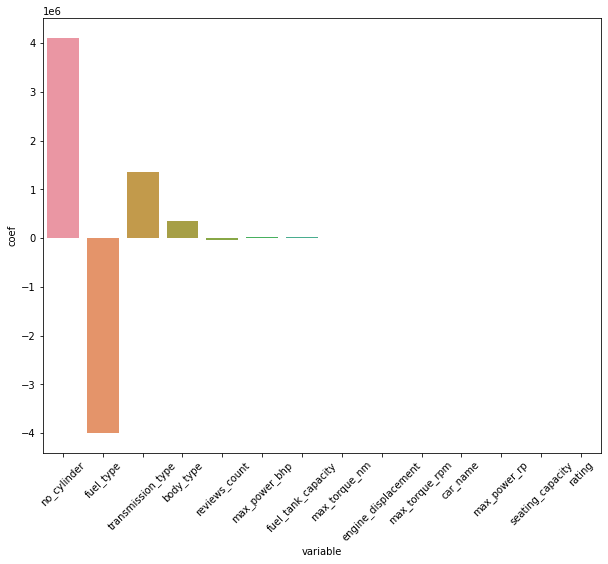

In [145]:
# Plot Coefficient
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, optimal_lasso)       


### Compare the residuals for the Ridge and Lasso visually

In [146]:
# Build the ridge and lasso using optimal alpha
ridger = Ridge(alpha=optimal_ridge.alpha_)
lassoer = Lasso(alpha=optimal_lasso.alpha_)

# fit the Lasso and Ridge outside of cross_val_score
print(ridger.fit(x,y))
print(lassoer.fit(x,y))

Ridge(alpha=217111.79456945008)
Lasso(alpha=1e-06)


In [147]:
# model residuals:
ridge_resid = y - ridger.predict(x)
lasso_resid = y - lassoer.predict(x)

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

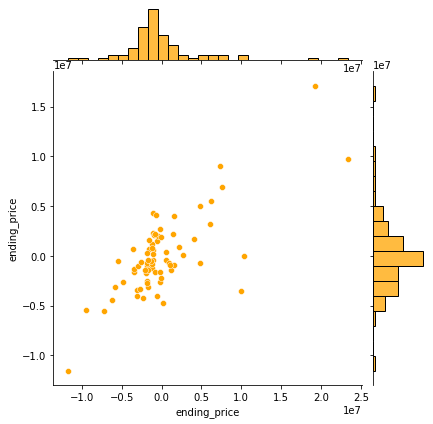

In [148]:
# Jointplot
plt.figure(figsize=(15,10))
sns.jointplot(ridge_resid, lasso_resid, color='orange');

### Gradient Boosting 

In [150]:
booster = GradientBoostingRegressor(n_estimators=150,
                                    max_depth=7,
                                    learning_rate = 0.15,
                                    random_state=33)

booster.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, n_estimators=150,
                          random_state=33)

In [151]:
print('Gradient Boosting Train Score is : ' , booster.score(x_train, y_train))
print('Gradient Boosting Test Score is : ' , booster.score(x_test, y_test))

Gradient Boosting Train Score is :  0.9999999999999993
Gradient Boosting Test Score is :  0.05857162340674393


In [152]:
prediction = booster.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.05857162340674393

In [153]:
y_pred_gb = booster.predict(x_test)
gb_mae = mean_absolute_error(y_test, y_pred_gb, multioutput='raw_values')
print('Mean Absolute Error Value is : ', gb_mae)

gb_mse = mean_squared_error(y_test, y_pred_gb, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(gb_mse))

Mean Absolute Error Value is :  [4777691.35516105]
Mean Squared Error Value by Square root is :  [6900722.53495444]


### Ada Boost

In [155]:
ada = AdaBoostRegressor(n_estimators=150,learning_rate = 0.15,random_state=33)

In [156]:
parameter = {
          'n_estimators': [100, 200, 300, 1000],
          'learning_rate': [0.5, 1.0, 1.5, 3.0]
}

ada_cv = GridSearchCV(ada,parameter,scoring='r2',cv=5)
ada_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(learning_rate=0.15, n_estimators=150,
                                         random_state=33),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 3.0],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [157]:
print("AdaBoost Training Score is : ", ada_cv.score(x_train,y_train))
print("AdaBoost Testing Score is : ", ada_cv.score(x_test,y_test))

AdaBoost Training Score is :  0.916972937694779
AdaBoost Testing Score is :  -0.09176993736750583


In [158]:
prediction = ada_cv.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

-0.09176993736750583

In [159]:
y_pred_ada = ada_cv.predict(x_test)
ada_mae = mean_absolute_error(y_test, y_pred_ada, multioutput='raw_values')
print('Mean Absolute Error Value is : ', ada_mae)

ada_mse = mean_squared_error(y_test, y_pred_ada, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(ada_mse))

Mean Absolute Error Value is :  [5298791.47894247]
Mean Squared Error Value by Square root is :  [7431329.0031822]


###  Random Forest Regressor

In [162]:
random_f = RandomForestRegressor(random_state=0)

In [163]:
parameter = {
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}

random_f_cv = GridSearchCV(random_f,parameter,scoring='r2',cv=5)
random_f_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [164]:
prediction = random_f_cv.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.21601402488001553

In [165]:
print('Random Forest Train Score is : ' , random_f_cv.score(x_train, y_train))
print('Random Forest Test Score is : ' , random_f_cv.score(x_test, y_test))

Random Forest Train Score is :  0.9333033558245419
Random Forest Test Score is :  0.21601402488001553


In [166]:
y_pred_rf = random_f_cv.predict(x_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Absolute Error Value is : ', rf_mae)

rf_mse = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(rf_mse))

Mean Absolute Error Value is :  [3925712.]
Mean Squared Error Value by Square root is :  [6297309.95692182]


In [169]:
# RIDGE REGRESSION MODEL
y_pred_ridge - ridge_cv.predict(x_test)

# LASSO REGRESSION MODEL
y_pred_lasso = lasso_cv.predict(x_test)

# LINEAR REGRESSION MODEL
y_pred_linear = lr_cv.predict(x_test)

# ADA BOOST MODEL
prediction = ada_cv.predict(x_test)

# GRADIENT BOOST MODEL
y_pred_gb = booster.predict(x_test)


# RANDOM FOREST
y_pred_rf = random_f_cv.predict(x_test)


predictions = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,           
    "Ada Boost" : prediction,
    "Gradient Boost": y_pred_gb,
    "Random Forest": y_pred_rf
         }

In [170]:
def get_scores(predictions, y_test):
    model_score = {}
    for name, value in predictions.items():
        model_score[name] = r2_score(y_true=y_test, y_pred=value)
    return model_score

In [171]:
summary = get_scores(predictions, y_test)
summary = pd.DataFrame([summary])
summary = summary.melt(var_name="Models", value_name="R2 Scores")

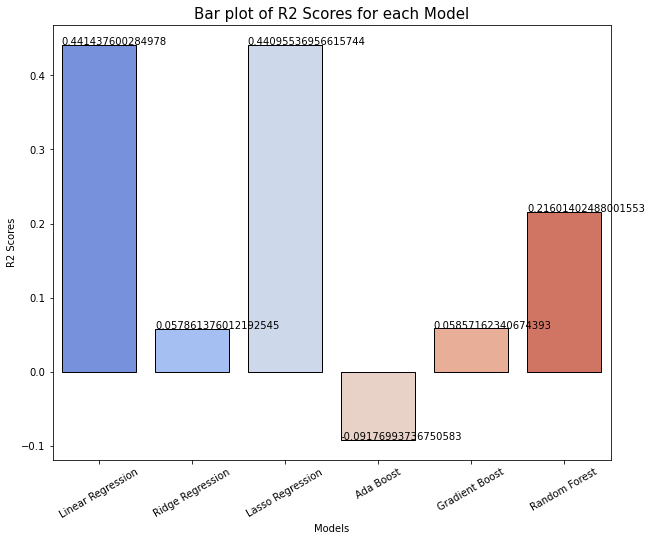

In [172]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=summary, x=summary['Models'], y=summary["R2 Scores"], edgecolor='black', ci='sd', palette='coolwarm')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1, p.get_height()*1)),
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title('Bar plot of R2 Scores for each Model', fontsize=15)       

